In [1]:
import celmech
import rebound
%matplotlib inline

Let's begin by setting up a simple REBOUND N-body simulation:

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd232c373d0>)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


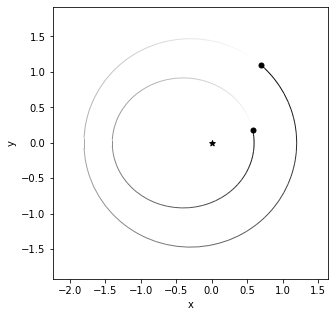

In [2]:
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1e-3, a=1, e=0.4, f = 0.3)
sim.add(m=1e-3, a=1.5, e=0.2, f = 1)
sim.move_to_com()
rebound.OrbitPlot(sim)

By default, REBOUND calculates orbital elements using Jacobi coordinates (and total interior mass for the primary), and uses these for initializing particles:

In [3]:
for o in sim.calculate_orbits():
    print(o)

<rebound.Orbit instance, a=0.9999999999999996 e=0.39999999999999986 inc=0.0 Omega=0.0 omega=0.0 f=0.2999999999999998>
<rebound.Orbit instance, a=1.4999999999999998 e=0.19999999999999996 inc=0.0 Omega=0.0 omega=0.0 f=1.0>


These will differ from orbital elements calculated using canonical heliocentric coordinates by of order the planet-star mass ratio, which is an important discrepancy for precision calculations. `celmech` provides convenience functions for calculating canonical heliocentric orbital elements instead:

In [4]:
from celmech.nbody_simulation_utilities import reb_calculate_orbits

for o in reb_calculate_orbits(sim):
    print(o)

<rebound.Orbit instance, a=0.9977303754744342 e=0.39872038905346907 inc=0.0 Omega=0.0 omega=6.281183779126955 f=0.3020015280526307>
<rebound.Orbit instance, a=1.5032085303182583 e=0.20079106774500946 inc=0.0 Omega=0.0 omega=0.00669554257966265 f=0.9930035912831512>


There is also a convenience function for initializing a REBOUND Simulation using canonical heliocentric elements. It takes the physical mass of the body, together with a dictionary of orbital elements, where the keys can be any parameters REBOUND will accept for adding particles. To make the same simulation as above:

In [5]:
from celmech.nbody_simulation_utilities import reb_add_from_elements

sim = rebound.Simulation()
sim.add(m=1)
reb_add_from_elements(m=1e-3, elements={'a':1, 'e':0.4, 'f':0.3}, sim=sim)
reb_add_from_elements(m=1e-3, elements={'a':1.5, 'e':0.2, 'f':1}, sim=sim)
sim.move_to_com()

If we retrieve the orbital elements in canonical heliocentric elements, we get the same elements back (to within machine precision). Of course, if we now used REBOUND's functions (in Jacobi coordinates), e.g., `sim.particles[2].a`, we would get a value that differs by $O(10^{-3})$.

In [6]:
for o in reb_calculate_orbits(sim):
    print(o)

<rebound.Orbit instance, a=1.0000000000000004 e=0.40000000000000036 inc=0.0 Omega=0.0 omega=0.0 f=0.2999999999999998>
<rebound.Orbit instance, a=1.4999999999999998 e=0.19999999999999993 inc=0.0 Omega=0.0 omega=0.0 f=1.0>


Canonical heliocentric are the default coordinates in celmech. For both functions, we can also instead use the above functions using democratic heliocentric coordinates, e.g.

In [7]:
for o in reb_calculate_orbits(sim, coordinates = 'democratic heliocentric'):
    print(o)

<rebound.Orbit instance, a=0.9977167171632148 e=0.3986461268106377 inc=0.0 Omega=0.0 omega=6.282444738066171 f=0.3007405691134153>
<rebound.Orbit instance, a=1.4980418314113109 e=0.199262210454451 inc=0.0 Omega=0.0 omega=6.278966580276557 f=1.0042187269030292>


We can also convert a REBOUND simulation into a Poincare object to include only particular terms in the disturbing function (see https://github.com/shadden/celmech/blob/master/jupyter_examples/Basic_Poincare_Integration.ipynb for more details)

In [8]:
from celmech import Poincare

pvars = Poincare.from_Simulation(sim)